In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_csv('aug_train.csv')
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [136]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [137]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [138]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Impact of Education on Company Type')

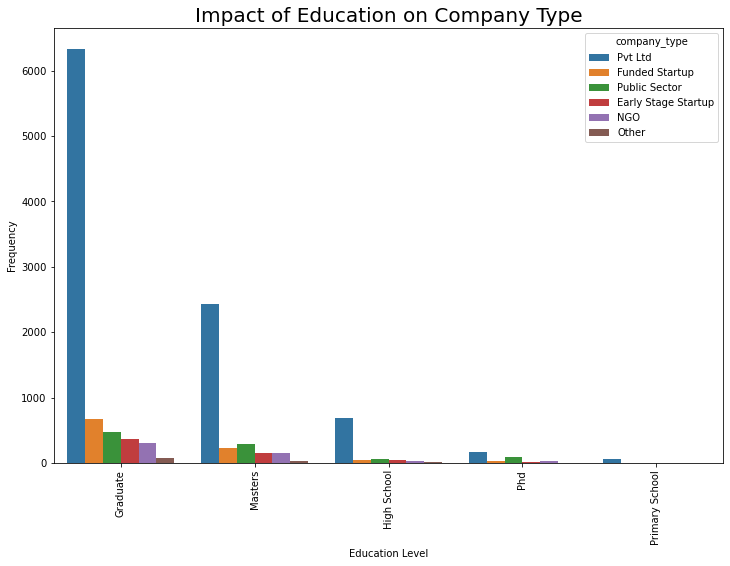

In [139]:
temp = data[['education_level', 'company_type']]
temp.dropna(axis=0, inplace = True)
value_counts = temp.value_counts().to_frame()
value_counts.reset_index(level=[0, 1], inplace=True)
value_counts = value_counts.rename(columns = {0:'count'})
bar, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = 'education_level', y = 'count', data = value_counts, hue='company_type')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Impact of Education on Company Type', fontsize=20)

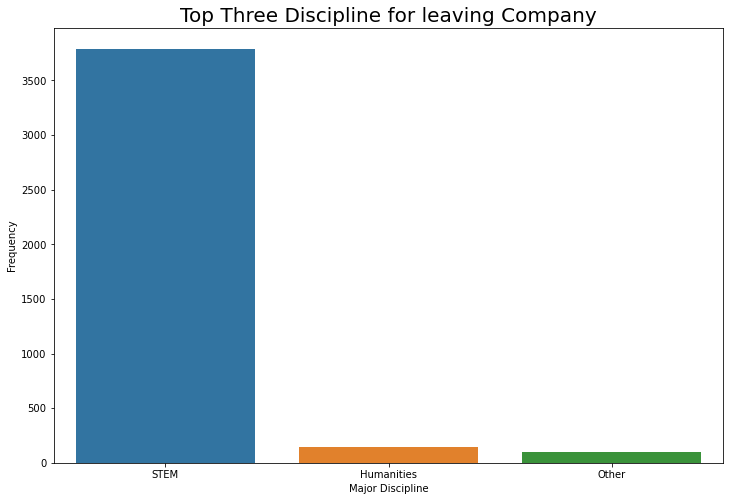

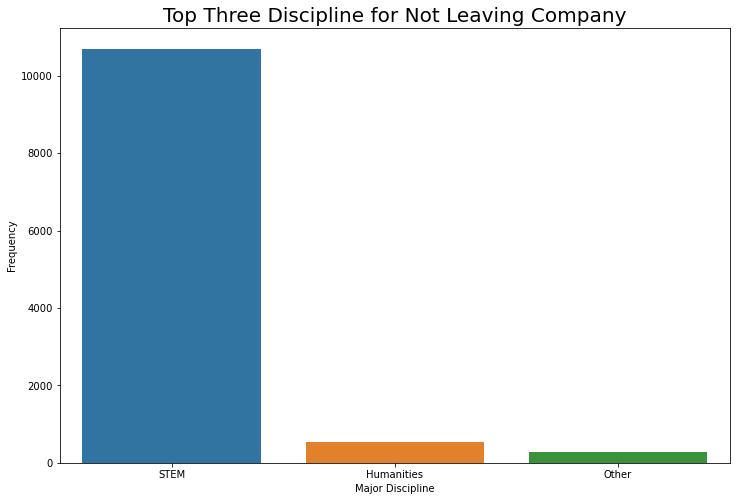

In [140]:
#Top Three Discipline
title = ['Top Three Discipline for leaving Company', 'Top Three Discipline for Not Leaving Company']
for index, target in enumerate(data['target'].unique()):
    major_discipline = data[data['target'] == target]['major_discipline']
    temp = major_discipline.value_counts().to_frame()
    temp.reset_index(level=[0], inplace= True)
    top_three = temp.iloc[:3,:]
    bar, ax = plt.subplots(figsize=(12,8))
    sns.barplot(x = 'index', y = 'major_discipline', data = top_three)
    plt.xlabel('Major Discipline')
    plt.ylabel('Frequency')
    plt.title(title[index], fontsize=20)

Text(0.5, 1.0, 'Impact of Gender on leaving company')

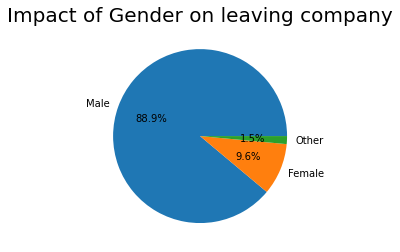

In [141]:
#Distribution over Gender
gender = data[data['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(4,4))
plt.pie(x = temp, labels = labels, autopct="%.1f%%")
plt.title('Impact of Gender on leaving company', fontsize=20)

Text(0.5, 1.0, 'Impact of Company type on leaving company')

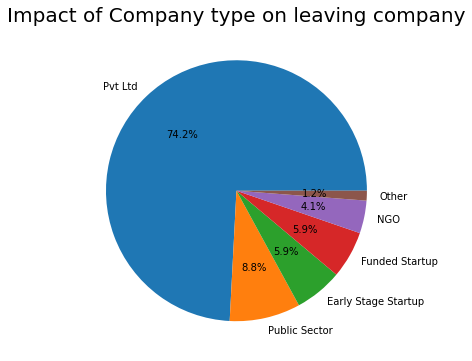

In [142]:
#Impact of Company type on leaving company
company_type = data[data['target'] == 1]['company_type']
temp = company_type.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(6,6))
plt.pie(x = temp, labels = labels, autopct="%.1f%%")
plt.title('Impact of Company type on leaving company', fontsize=20)

In [143]:
#Impact of Company Size on Target
size_details = list()
company_size = data['company_size'].unique()
for element in company_size:
    for target in data['target'].unique():
        company_target = data[(data['company_size'] == element) & (data['target'] == target)]
        count = company_target.shape[0]
        if target == 1.0:
            temp_target = 'Will Leave'
        else:
            temp_target = 'Will Not Leave'
            
        size_details.append([element, temp_target, count])
company_size = pd.DataFrame(size_details, columns=['size', 'target', 'count'])
company_size

,size,target,count
0,NaN,Will Leave,0
1,NaN,Will Not Leave,0
2,50-99,Will Leave,545
3,50-99,Will Not Leave,2538
4,<10,Will Leave,224
5,<10,Will Not Leave,1084
6,10000+,Will Leave,385
7,10000+,Will Not Leave,1634
8,5000-9999,Will Leave,102
9,5000-9999,Will Not Leave,461


Text(0.5, 1.0, 'Impact of Company Size on Target')

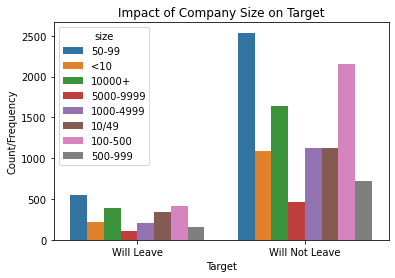

In [144]:
sns.barplot(x = 'target', y = 'count', data = company_size, hue='size')
plt.xlabel('Target')
plt.ylabel('Count/Frequency')
plt.title('Impact of Company Size on Target')

In [145]:
#Top 5 city with frequent job change
city_frequency = list()
unique_cities = data['city'].unique()
for city_id, city in enumerate(unique_cities):
    temp = data[(data['city'] == city) & (data['target'] == 1.0)]
    frequency = temp.shape[0]
    city_frequency.append([city, frequency])
city_data = pd.DataFrame(city_frequency, columns = ['city_name', 'frequency'])
sorted_city_frequency = city_data.sort_values(by = 'frequency', ascending = False)

Text(0.5, 1.0, 'Top 5 city with frequent job change')

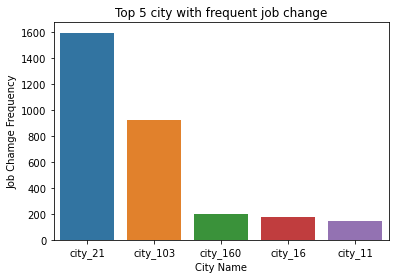

In [146]:
top = 5
top_five = sorted_city_frequency.iloc[:top, :]
sns.barplot(x = 'city_name', y='frequency', data = top_five)
plt.xlabel('City Name')
plt.ylabel('Job Chamge Frequency')
plt.title('Top 5 city with frequent job change')

In [147]:
#Training Hours Histogram
data['training_hours'].median(axis=0)

47.0

Text(0.5, 0, 'Training Hours')

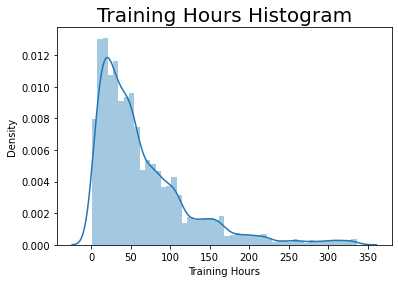

In [148]:
sns.distplot(a = data['training_hours'])
plt.title('Training Hours Histogram', fontsize=20)
plt.xlabel('Training Hours')

Text(0.5, 1.0, 'Class Distribution')

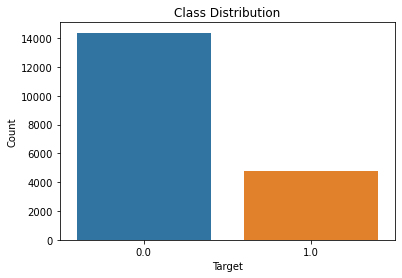

In [149]:
#Target Distribution
sns.countplot(x = 'target', data = data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')


In [150]:
#Experience Category over Target
data['relevent_experience'].unique()


array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [151]:
temp = list()
unique_experience = data['relevent_experience'].unique()
for eg in unique_experience:
    relevant_data = data[(data['relevent_experience'] == eg) & (data['target']==1)]
    non_relevant_data = data[(data['relevent_experience'] == eg ) & (data['target']==0)]
    temp.append([eg, 'target_1', relevant_data.shape[0]])
    temp.append([eg, 'target_0', non_relevant_data.shape[0]])
    
experience_data = pd.DataFrame(temp, columns = ['experience', 'target', 'count'])
experience_data

,experience,target,count
0,Has relevent experience,target_1,2961
1,Has relevent experience,target_0,10831
2,No relevent experience,target_1,1816
3,No relevent experience,target_0,3550


Text(0, 0.5, 'Count')

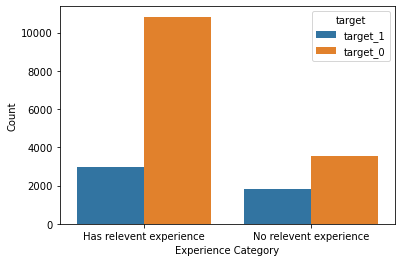

In [152]:
sns.barplot(x = 'experience', y = 'count', hue = 'target', data = experience_data)
plt.xlabel('Experience Category')
plt.ylabel('Count')

# Data Cleaning and Processing

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

There are some missing values in the dataset. First we have to handle those NaNs.

In [154]:
data['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [155]:
data['enrolled_university'].value_counts()


no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [156]:
data['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [157]:
data['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [158]:
data['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [159]:
data['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [160]:
data['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [161]:
data['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

By finding out the most occuring values in each of these categorical columns,we can now replace NaNs in those column with this.

In [163]:
data['gender'] = data['gender'].replace(np.nan, 'Male')
data['enrolled_university'] = data['enrolled_university'].replace(np.nan, 'no_enrollment')
data['education_level'] = data['education_level'].replace(np.nan,'Graduate')
data['major_discipline'] = data['major_discipline'].replace(np.nan,'STEM')
data['experience'] = data['experience'].replace(np.nan,'>20')
data['company_size'] = data['company_size'].replace(np.nan,'50-99')
data['company_type'] = data['company_type'].replace(np.nan,'Pvt Ltd')
data['last_new_job'] = data['last_new_job'].replace(np.nan,'1')

In [164]:
#Label encoding for coverting labels in Classification to numeric forms
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
data.city=le.fit_transform(data['city'])
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,77,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,64,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,14,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,50,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [166]:
# Making Dictionaries of ordinal features

gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}
company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [167]:
# Transforming Categorical features into numarical features

data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
data.loc[:,'company_size'] = data['company_size'].map(company_size_map)
data.loc[:,'company_type'] = data['company_type'].map(company_type_map)
data.loc[:,'last_new_job'] = data['last_new_job'].map(last_new_job_map)
data.loc[:,'major_discipline'] = data['major_discipline'].map(major_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'gender'] = data['gender'].map(gender_map)
data.loc[:,'experience'] = data['experience'].map(experience_map)


In [168]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,1,0,2,0,21,5,0,1,36,1.0
1,29725,77,0.776,1,0,0,2,0,15,5,0,5,47,0.0
2,11561,64,0.624,1,0,1,2,0,5,5,0,0,83,0.0
3,33241,14,0.789,1,0,0,2,1,0,5,0,0,52,1.0
4,666,50,0.767,1,1,0,3,0,21,5,1,4,8,0.0


In [169]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

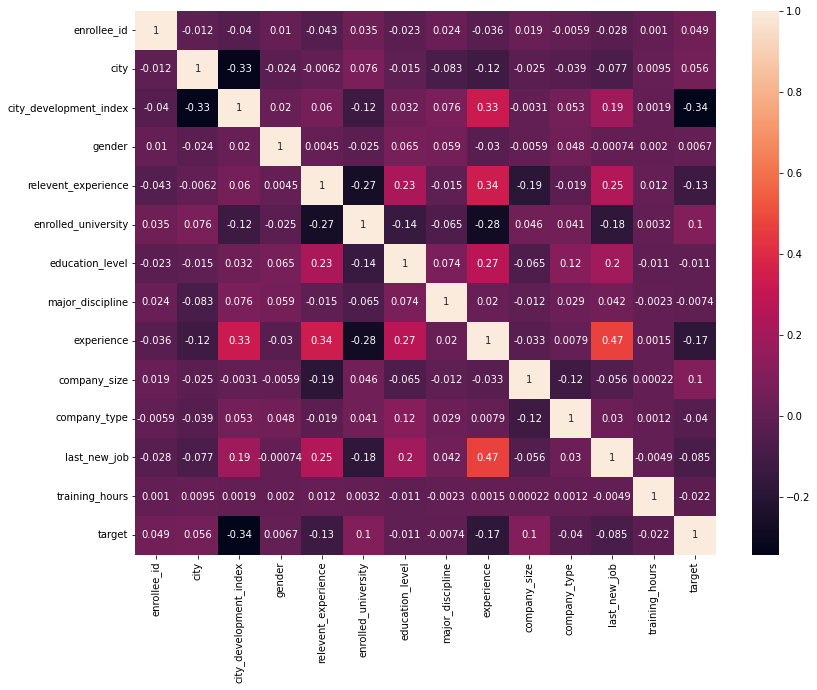

In [170]:
#Correlation between the datas
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(), annot = True);
plt.show()

In [31]:
#Feature reduction
data=data.drop(['enrollee_id'],axis=1)
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,1,0,2,0,21,5,0,1,36,1.0
1,77,0.776,1,0,0,2,0,15,5,0,5,47,0.0
2,64,0.624,1,0,1,2,0,5,5,0,0,83,0.0
3,14,0.789,1,0,0,2,1,0,5,0,0,52,1.0
4,50,0.767,1,1,0,3,0,21,5,1,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,1,0,0,2,3,14,5,0,1,42,1.0
19154,5,0.920,1,1,0,2,0,14,5,0,4,52,1.0
19155,5,0.920,1,1,0,2,0,21,5,0,4,44,0.0
19156,94,0.802,1,1,0,1,0,0,6,0,2,97,0.0


In [177]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score,plot_roc_curve,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [178]:
# Independent & Dependent Variables Split
y= pd.DataFrame(data['target'])
X= data.drop(['target'],axis=1)

In [179]:
#Standardization
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

In [180]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y)

In [181]:
X_train.shape

(15326, 13)

In [182]:
X_test.shape

(3832, 13)

In [183]:
y_train.shape

(15326, 1)

In [184]:
y_test.shape

(3832, 1)

Modelling

In [185]:
#1.Logistic Regression
log_reg= LogisticRegression(random_state=42,max_iter=10000)
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
log_reg_y_pred_train = log_reg.predict(X_train)
log_reg_y_pred_test = log_reg.predict(X_test)
print('Logistic Regression Accuracy score:',accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(log_reg.get_params())

Logistic Regression Accuracy score: 0.774008350730689
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2877
         1.0       0.61      0.26      0.36       955

    accuracy                           0.77      3832
   macro avg       0.70      0.60      0.61      3832
weighted avg       0.75      0.77      0.74      3832

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [186]:
#2.kNN 
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
print('KNN Accuracy score:',accuracy_score(y_pred_knn,y_test))
print('f1 score is:',f1_score(y_pred_knn,y_test,average='micro'))
print(classification_report(y_test,y_pred))
print(knn.get_params())

KNN Accuracy score: 0.7372129436325678
f1 score is: 0.7372129436325677
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2877
         1.0       0.61      0.26      0.36       955

    accuracy                           0.77      3832
   macro avg       0.70      0.60      0.61      3832
weighted avg       0.75      0.77      0.74      3832

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [187]:
#3.Decision Tree
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred= dt.predict(X_test)
print('Decision Tree accuracy score:',accuracy_score(dt_pred,y_test))
print('f1 score is:',f1_score(dt_pred,y_test,average='micro'))
print(classification_report(y_test,y_pred))
print(dt.get_params())

Decision Tree accuracy score: 0.7100730688935282
f1 score is: 0.7100730688935282
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2877
         1.0       0.61      0.26      0.36       955

    accuracy                           0.77      3832
   macro avg       0.70      0.60      0.61      3832
weighted avg       0.75      0.77      0.74      3832

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [188]:
#4.SVM Classifier
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Accuracy is:",(accuracy_score(y_test,y_pred),3))
print("f1 score is:",(f1_score(y_test,y_pred),3))
print(svm_model.get_params())

Accuracy is: (0.7841858037578288, 3)
f1 score is: (0.4460817146684528, 3)
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [189]:
#5.Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Randon Forest Accuracy is:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Randon Forest Accuracy is: 0.7823590814196242
Confusion Matrix:
 [[2618  259]
 [ 575  380]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      2877
         1.0       0.59      0.40      0.48       955

    accuracy                           0.78      3832
   macro avg       0.71      0.65      0.67      3832
weighted avg       0.76      0.78      0.77      3832



Random Forest Classifier gives the best prediction for the employess who are leaving the company and those who not leave the company.

In [190]:
#Hypertuning Parameter

In [191]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 10000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, verbose=1, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)
y_pred = logModel_grid.predict(X_test)
print("Accuracy is:",(accuracy_score(y_test,y_pred),3))
print("f1 score is:",(f1_score(y_test,y_pred),2))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='sag')
Accuracy is: (0.7270354906054279, 3)
f1 score is: (0.542432195975503, 2)


In [192]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train,y_train)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
dt_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned decision tree classifier is: ', dt_accuracy)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
The accuracy score with using the tuned decision tree classifier is:  0.7801775381772632


In [193]:
params = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train,y_train)

grid_search_cv.best_estimator_
grid_search_cv.best_params_
rf_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Random Forest is :',rf_accuracy)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
The accuracy score with using the tuned Random Forest is : 0.771825560136965


After fine tuning we can see decision tree classifier gives the best prediction compared to the other two classifiers.